# Picard's Method for solving ODEs.

## An example

One of my colleagues (Dr. Ryan Hamilton, at University of Calgary) had heard about Jupyter notebooks, and asked me for a demo. He is teaching a course on Functional Analysis, so I suggested doing a simple example to demonstrate an application of fixed point theory to the solution of ordinary differential equations. It took only a few minutes to write up the following note, which he will use in class.

In [2]:
x = cos(1)


0.5403023058681398

## Fixed point methods for solving ODEs

### M. Lamoureux March 4, 2016

This method is called Picard's method. The idea is to start with a first order equation (or system of equations) in the form
$$ y' = f(t,y(t)),  \mbox{ with } y(t_0) = y_o$$
and convert to an integral form
$$ y(t) = y_o + \int_{t_0}^t f(s,y(s)) \,ds. $$

The iteration runs by creating a sequence of functions $y_1(t), y_2(t), y_3(t), \ldots$ and hoping they converge to the answer. The first function in the sequence is
$$ y_1(t) = y_o \mbox{ that is, it is the constant function with value } y_o.$$
Then the next function $y_2$ is given by integrating $f(t,y_1(t))$, so
$$ y_2(t) = y_o + \int_{t_0}^t f(s,y_1(s)) \,ds, $$
and in gereral we will define $y_{k+1}$ in terms of the previous $y_k$ as
$$y_{k+1}(t) = y_o + \int_{t_0}^t f(s,y_k(s)) \,ds. $$
With suitable conditions on the function $f(t,y)$, we can show this sequence converges to a solution of the ODE.

Let's do this in code. We use Julia here, because I am trying to learn this language, which is apparently good for math. You could easily do this in Python or Matlab.


First, we add a plotting package, so we can plot our answers later. 

In [3]:
#Pkg.add("PyPlot")
using PyPlot


Let's try to solve the simple ODE
$$ y' = 2y \mbox{ with } y(0) = 1.$$
We know the exact answer is the exponential function $y(t) = \exp(2t)$. 

For the numerical problem, we set up a time variable t (which is a vector of sample points from 0 to 1), a solutions variable y (which is an array, with one column for each approximate solution $y_k$, and a function formula $f = 2*y*dt$ which we will sum up in order to integrate.


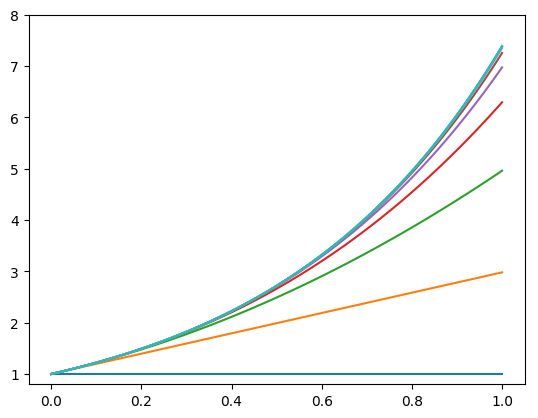

In [4]:
t=linspace(0,1,100)    # the time variable, a vector of entries linearly spaced from 0 to 1.
dt = 1/100;            # step size for the integrals
y=zeros(100,10)        # an array for the solutions. Each column represents a function y_k

y[:,1] = 1             # this is our initial function guess, the constant function 1

for k = 1:9            
    f=2*y[:,k]*dt      # here we compute the integrand  2*y*dt
    f[1]=1             # this is y_o
    y[:,k+1] = cumsum(f,1)    # the cummulative sum is the Riemann sums of the integral
end

plot(t,y)              # now we plot the various functions that approximate the solution
ylim(.8,8)

It is easy to see in the functions above that the $y_1$ function is the constant 1 function, the $y_2$ function is the linear function going straight from 1 to 3, the next one is a quadratic, and so on. These functions quickly converge to something that looks like an exponential.

Let try a harder ODE, like this:
Let's try to solve the simple ODE
$$ y' = (1-t)y \mbox{ with } y(0) = 1.$$
We expect something like exponential growth for $t$ close to zero, but once $(1-t)$ becomes negative, we should get rapid decay. Let's see if the numerics show this. 


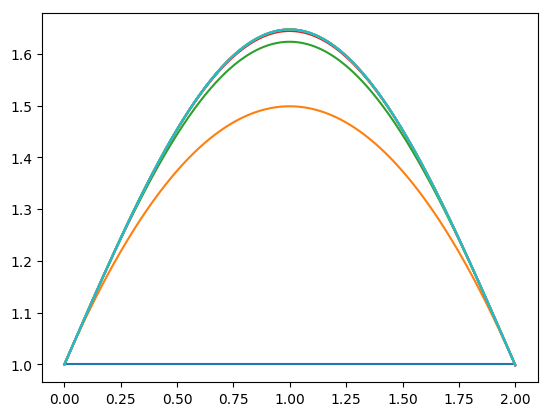

10-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31be4ccd0>
 PyObject <matplotlib.lines.Line2D object at 0x31be4c890>
 PyObject <matplotlib.lines.Line2D object at 0x31be4c6d0>
 PyObject <matplotlib.lines.Line2D object at 0x31bf7e550>
 PyObject <matplotlib.lines.Line2D object at 0x31bf7e0d0>
 PyObject <matplotlib.lines.Line2D object at 0x31bf7e990>
 PyObject <matplotlib.lines.Line2D object at 0x31bd67b90>
 PyObject <matplotlib.lines.Line2D object at 0x31bd67a50>
 PyObject <matplotlib.lines.Line2D object at 0x31bd67890>
 PyObject <matplotlib.lines.Line2D object at 0x31bd67a90>

In [5]:
t0=0    # Let's set up our initial parameters with labels
t1=2
y0 = 1
npoints = 1000    # number of sample points along the time axis 
niters = 10       # number of iterations for Picard's method

t=linspace(t0,t1,npoints)    
dt = (t1-t0)/npoints;           
y=zeros(npoints,niters)        

y[:,1] = y0             # this is the initial function, the constant function y0

for k = 1:(niters-1)            
    f=(1-t).*y[:,k]*dt  # here we compute the integrand  (1-t)*y*dt
    f[1]=y0             # initial value in y0 + \int f(t,y)
    y[:,k+1] = cumsum(f,1)    # the cummulative sum is the Riemann sums of the integral
end

plot(t,y)              # now we plot the various functions that approximate the solution


Okay, we see in the above plots that the solution is growing up to t=1, then decaying. Looks good. 

But, you should try investigating longer intervals. This reveals that the behaviour can get weird for larger values of t. This suggests we have to be careful with Picard's method to be sure of convergence. 

Here in the code and plot below, we see what happens on the t-interval $[0,5]$.


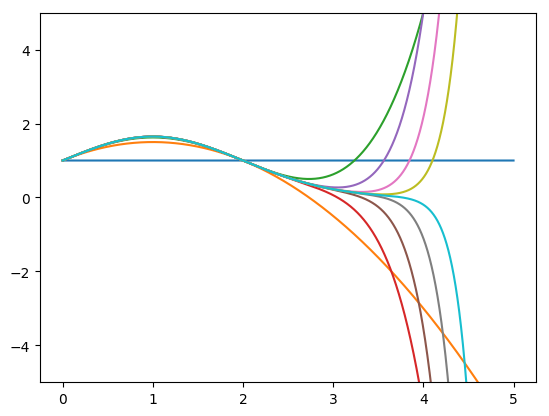

(-5,5)

In [6]:
t0=0
t1=5
y0 = 1
npoints = 10000
niters = 10

t=linspace(t0,t1,npoints)    
dt = (t1-t0)/npoints;           
y=zeros(npoints,niters)        

y[:,1] = y0            

for k = 1:(niters-1)            
    f=(1-t).*y[:,k]*dt  
    f[1]=y0             
    y[:,k+1] = cumsum(f,1)    
end

plot(t,y)              
ylim(-5,5)

We see in the above that the approximate solutions are starting to blow up. Why? 

It might be useful to solve the ODE exactly. It's pretty easy to find the exact solution is
$$y(t) = \exp(t-t^2/2),$$
which should decay rapidly to zero. 

Probably in the numerics, the approximate solution is going negative, which messes up everything. 